In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
df = pd.read_csv("Documents/data.csv")
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
Date                         360 non-null object
No Of Sessions               359 non-null float64
Accumulated Sessions         360 non-null int64
Unique Drivers               360 non-null int64
No. of Ports                 360 non-null int64
Energy(kWh)                  360 non-null int64
Accumulated_Energy(MWh)      360 non-null float64
GHG_savings(kg)              359 non-null float64
Accumulated GHG (kg)         360 non-null object
Charge time (minutes)        360 non-null int64
Gasoline_Savings(gallons)    360 non-null float64
Charge Fee(in$)              360 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 33.8+ KB


Index(['Date', 'No Of Sessions', 'Accumulated Sessions', 'Unique Drivers',
       'No. of Ports', 'Energy(kWh)', 'Accumulated_Energy(MWh)',
       'GHG_savings(kg)', 'Accumulated GHG (kg)', 'Charge time (minutes)',
       'Gasoline_Savings(gallons)', 'Charge Fee(in$)'],
      dtype='object')

C:\Users\roshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\roshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


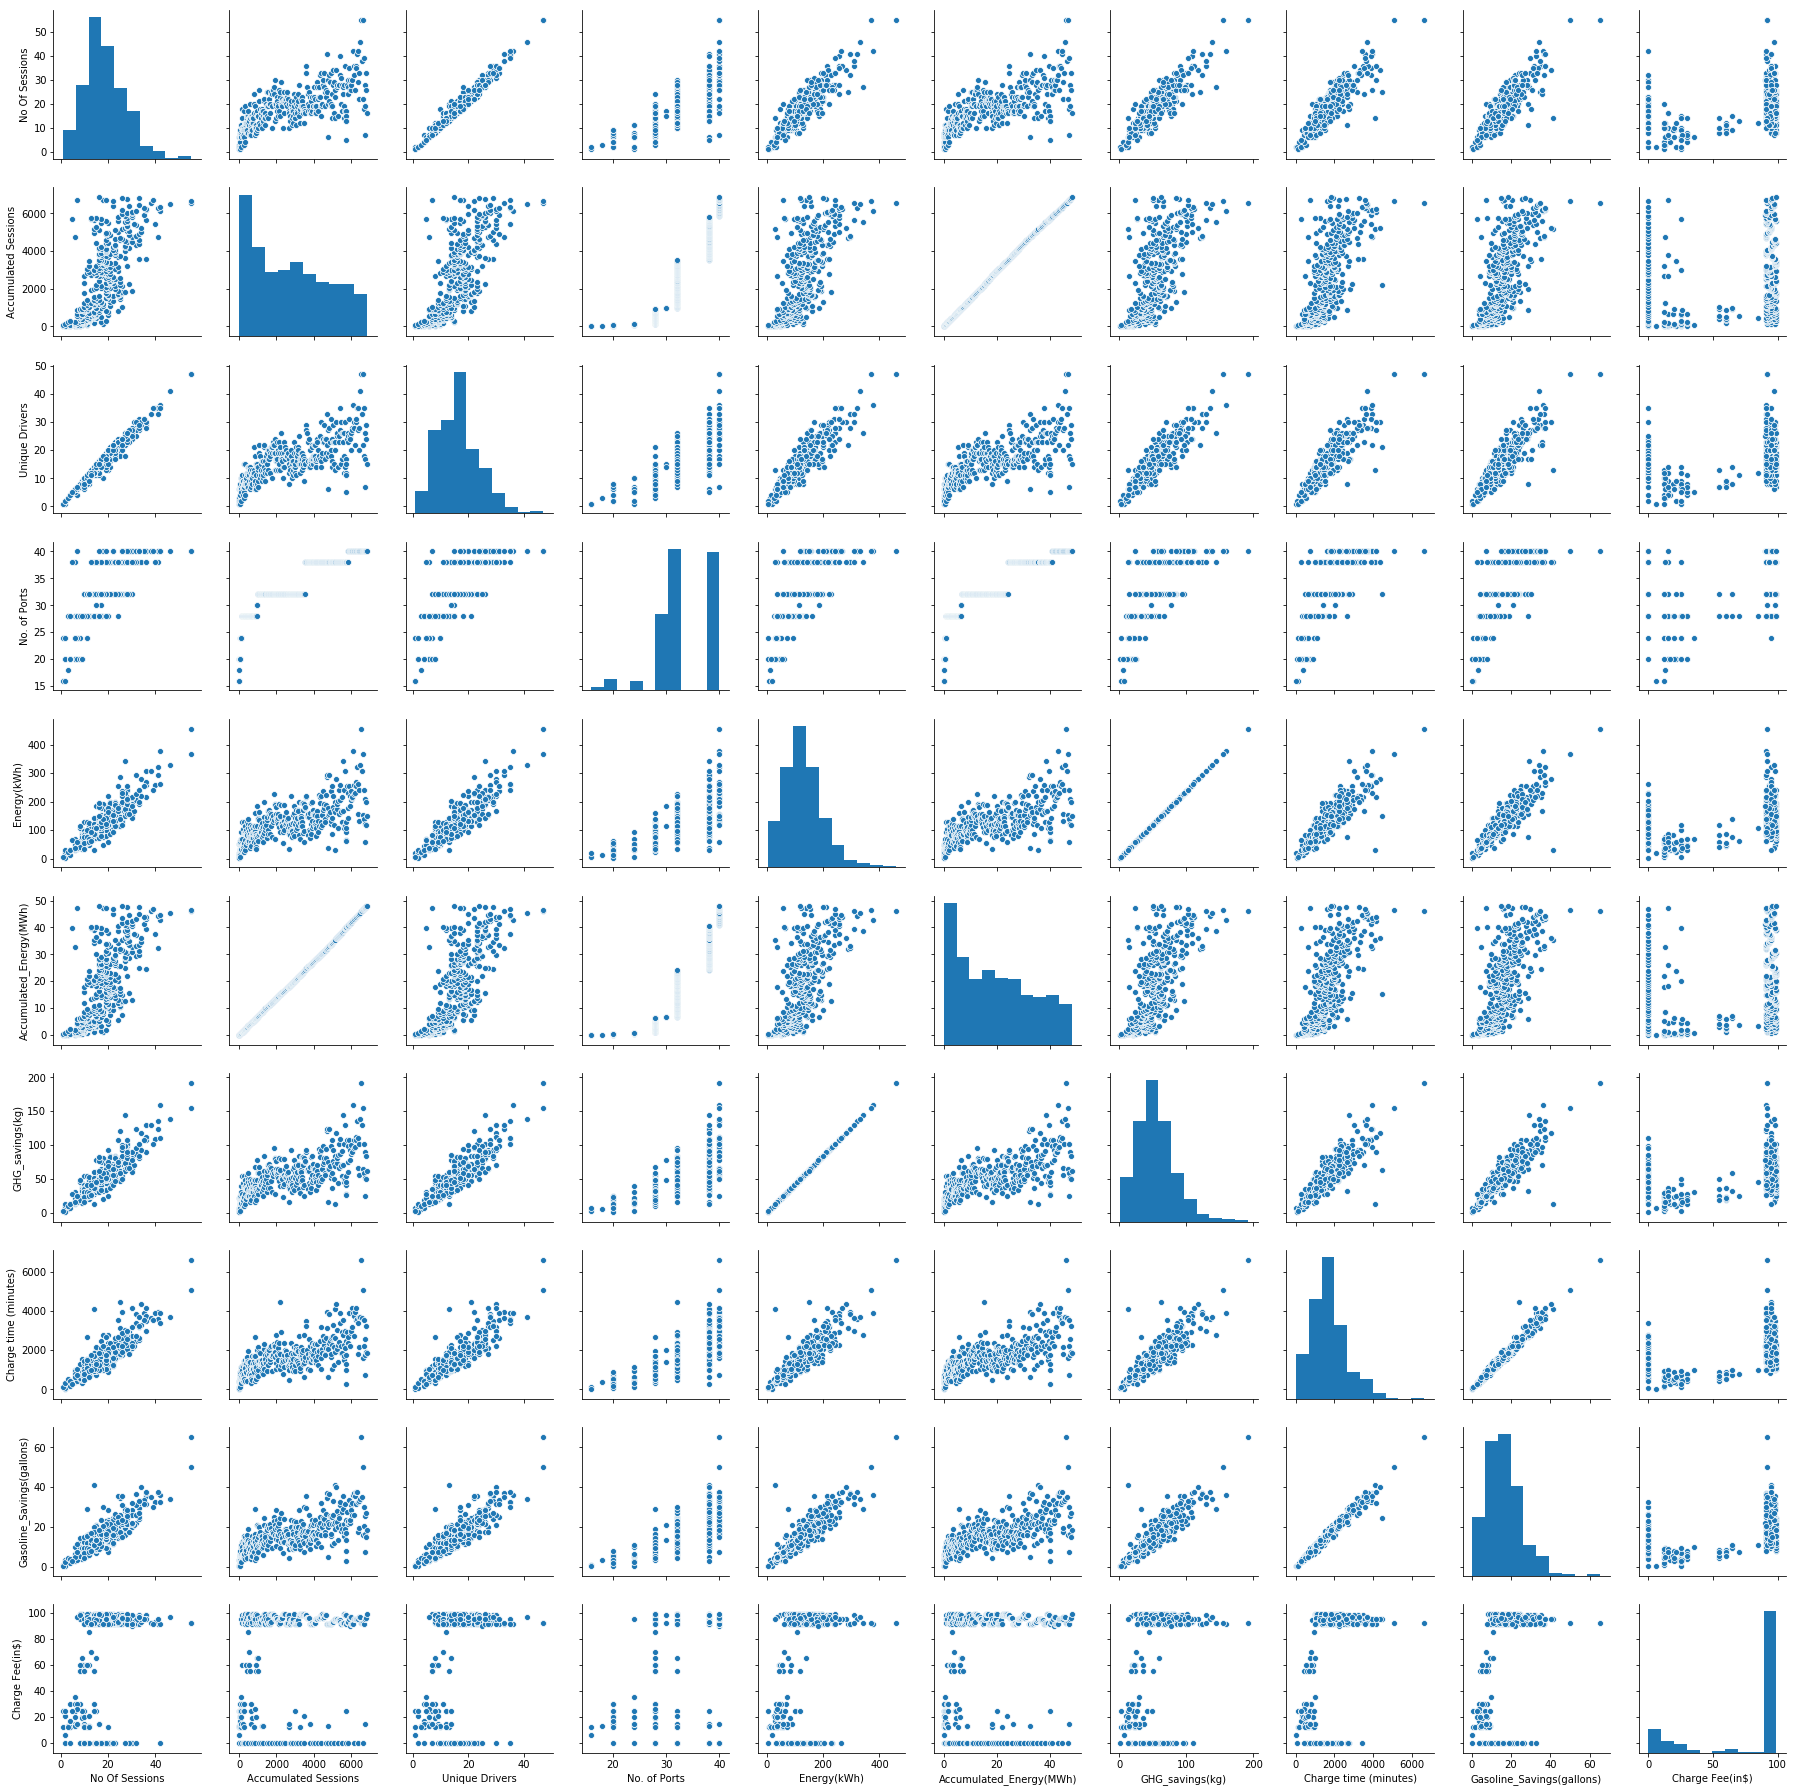

In [14]:
sns.pairplot(df)

C:\Users\roshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


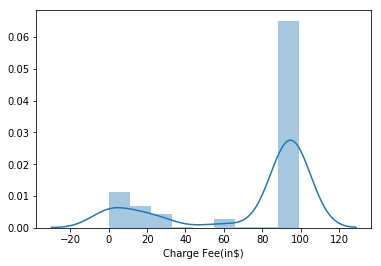

In [15]:
sns.distplot(df['Charge Fee(in$)'])

In [16]:
df.corr()

,No Of Sessions,Accumulated Sessions,Unique Drivers,No. of Ports,Energy(kWh),Accumulated_Energy(MWh),GHG_savings(kg),Charge time (minutes),Gasoline_Savings(gallons),Charge Fee(in$)
No Of Sessions,1.000000,0.694961,0.981566,0.714095,0.889673,0.695645,0.889382,0.874617,0.866272,0.388675
Accumulated Sessions,0.694961,1.000000,0.718083,0.908082,0.664771,0.999810,0.663109,0.675435,0.667391,0.237154
Unique Drivers,0.981566,0.718083,1.000000,0.731184,0.891892,0.718792,0.891151,0.873118,0.866737,0.391258
No. of Ports,0.714095,0.908082,0.731184,1.000000,0.667050,0.906407,0.665606,0.673498,0.669431,0.322776
Energy(kWh),0.889673,0.664771,0.891892,0.667050,1.000000,0.666485,0.999940,0.868119,0.885875,0.359449
Accumulated_Energy(MWh),0.695645,0.999810,0.718792,0.906407,0.666485,1.000000,0.664837,0.677430,0.668885,0.235825
GHG_savings(kg),0.889382,0.663109,0.891151,0.665606,0.999940,0.664837,1.000000,0.867540,0.885424,0.355917
Charge time (minutes),0.874617,0.675435,0.873118,0.673498,0.868119,0.677430,0.867540,1.000000,0.979952,0.407868
Gasoline_Savings(gallons),0.866272,0.667391,0.866737,0.669431,0.885875,0.668885,0.885424,0.979952,1.000000,0.408681
Charge Fee(in$),0.388675,0.237154,0.391258,0.322776,0.359449,0.235825,0.355917,0.407868,0.408681,1.000000


In [17]:
X  = df.iloc[:,1:-1]
Y =  df.iloc[:,11]
X["Accumulated GHG (kg)"] = X["Accumulated GHG (kg)"].apply(lambda x: float(x.split()[0].replace(',', '')))
# Y = Y.apply(lambda x: float(x.split("'")[0].replace(',', '')))
eliminate_zero = Y.mean()
Y = Y.mask(Y == 0, eliminate_zero)
X = X.values
Y = Y.values

In [18]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(X)
X= imputer.transform(X)

C:\Users\roshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
prediction = linear_regression.predict(X_test)

In [22]:
prediction

array([ 35.97218779,  77.31193963,  86.70360178,  85.03249486,
        61.23372195, 100.87505117, 102.93166294,  67.06454547,
        73.469528  ,  84.78755339,  68.38189655,  66.37038948,
        80.39076018, 121.7684763 ,  90.36504756,  84.74201039,
        90.96758588,  71.59526314,  72.78407473,  95.31489636,
        77.81737932,  87.45128782,  71.19179737,  82.91267748,
       108.57230878, 103.34322667,  68.86762295,  65.77467476,
        55.15317102,  90.62089595,  91.88625602, 105.3097544 ,
        76.41492465,  80.96553886,  72.6505691 ,  65.41746689,
        85.10503977,  89.08574404, 117.01558388,  82.31899103,
        46.25052691,  82.42239418,  86.01166079,  86.53530272,
        86.99572218, 114.07374205,  90.95818465,  64.75672692,
        76.1651108 ,  51.84867313,  96.43810422,  87.52153879,
        77.20979401,  78.90987973,  35.01497095,  69.35000014,
        80.00396888, 102.51764297,  69.37100236,  93.86499806,
        70.54555262,  93.1229071 ,  88.63334199,  67.69

In [23]:
linear_regression.predict([[1,1,1,16,7,0.01,3,3,123,0.82]])

array([18.41808282])